<a href="https://colab.research.google.com/github/jakejang91/KSE_HW/blob/master/Deep_Learning_Practice_(Part_1)_class_Jae_Hyuk_Jang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-exercise session 1

## Exercise

In this exercise,
* We download a pre-trained model that classifies a given image as a cat or dog.
* We download two cats and two dogs images from the web
* We will preprocess images and classify images into cat or dog

**Import packages**

In [0]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

**Download and load an exercise-model**

In [0]:
!gdown https://drive.google.com/uc?id=1SJVAMBWDcax5h4Jbt1VeoY7pw5Tt3vRM --output exercise_model.h5
model = load_model('exercise_model.h5')

Downloading...
From: https://drive.google.com/uc?id=1SJVAMBWDcax5h4Jbt1VeoY7pw5Tt3vRM
To: /content/exercise_model.h5
13.9MB [00:00, 84.8MB/s]


**Download four images from the web**

In [0]:
!curl https://newsimg.hankookilbo.com/2019/04/29/201904291390027161_3.jpg --output sample1.jpg
!curl https://pds.joins.com/news/component/htmlphoto_mmdata/201904/08/1d956ae6-eb9c-4a04-8f1f-d1a9e719cde5.jpg --output sample2.jpg
!curl https://t1.daumcdn.net/cfile/tistory/991B36425DC0FF5408 --output sample3.jpg
!curl https://www.ui4u.go.kr/depart/img/content/sub03/img_con03030100_01.jpg --output sample4.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  166k  100  166k    0     0   111k      0  0:00:01  0:00:01 --:--:--  111k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26526  100 26526    0     0  12541      0  0:00:02  0:00:02 --:--:-- 12541
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  181k  100  181k    0     0   202k      0 --:--:-- --:--:-- --:--:--  202k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30460  100 30460    0     0  11477      0  0:00:02  0:00:02 --:--:-- 11477


**Preview images to be downloaded**
![alt text](https://drive.google.com/uc?id=1c9QuEk08lh3DnAesC-sv3iP0beE4ULhk)


**Function that preprocesses an image and returns classification result**

In [0]:
def classify_cat_dog(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = expanded_img_array / 255.  # Preprocess the image

    prediction = model.predict(preprocessed_img)

    print('cat: %f, dog: %f\n' %(prediction[0][0],prediction[0][1]))

**(Code requirement) Let's classify downloaded images using the function we defined!** 

In [0]:
images = ['sample1.jpg','sample2.jpg','sample3.jpg','sample4.jpg']

import matplotlib.pyplot as plt
# what you need to do is...
# complete a code to classify the 4 downloaded images
# hint : use loop (for)
for i in images:
  classify_cat_dog(i,model)



cat: 0.999999, dog: 0.000001

cat: 0.999858, dog: 0.000142

cat: 0.001617, dog: 0.998383

cat: 0.000221, dog: 0.999779



## Additional exercise

We will print classified images using code

**(Code requirement) Function that preprocesses an image and returns classification result with printing the image**

In [0]:
import matplotlib.pyplot as plt

def classify_cat_dog2(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = expanded_img_array / 255.  # Preprocess the image

    prediction = model.predict(preprocessed_img)

    print('cat: %f, dog: %f\n' %(prediction[0][0],prediction[0][1]))
     # complete a code to print the classified image
    # hint: use following codes
        # plt.imshow() // Image object must be parameter in this function
        # plt.show()

    plt.imshow(img)
    plt.show()
   

**(Code requirement) Let's print images with classification result!**

cat: 0.999999, dog: 0.000001



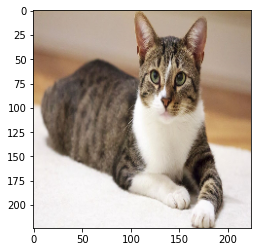

cat: 0.999858, dog: 0.000142



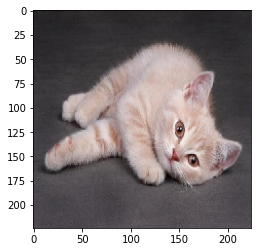

cat: 0.001617, dog: 0.998383



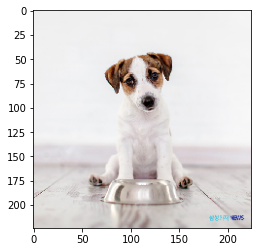

cat: 0.000221, dog: 0.999779



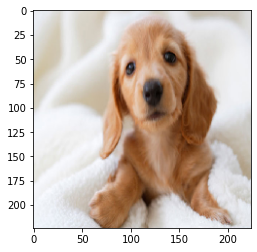

In [0]:
# what you need to do is...
# complete a code to print images and with classification result using obove function
# Note that function name is classify_cat_dog2

for i in images:
  classify_cat_dog2(i,model)

# Mini-exercise session 2

In this exercise,
* We download 10 images (three images are similar each other and the other seven are different kinds of images).
* We extract the features of downloaded images using the ResNet50 model.
* Finally, we will use the NearestNeighbors function to retrieve two images most similar to the query image (i.e., one of three similar images) from 10 images

## Exercise

**Import packages**

In [0]:
import numpy as np
from numpy.linalg import norm
from tqdm import tqdm, tqdm_notebook
import os
import random
import time
import tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

**Download and unzip images**

In [0]:
from zipfile import ZipFile

!mkdir -p ./dataset_ex1
!gdown https://drive.google.com/uc?id=1Q9tjHGZaia4ZvQcWmZYV3zczFBVHhqtx --output dataset.zip

with ZipFile('dataset.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('dataset_ex1')

Downloading...
From: https://drive.google.com/uc?id=1Q9tjHGZaia4ZvQcWmZYV3zczFBVHhqtx
To: /content/dataset.zip
100% 168k/168k [00:00<00:00, 63.6MB/s]


**Define a function that gets the list of all names of image file in the given directory**

In [0]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_list(root_dir):
    file_list = []
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
    return file_list

**(Code requirement) Specify the name of directory in which downloaded images are stored**

In [0]:
# what you need to do is...
# complete a code to specify the name of direcory in which downloaded images are stored

root_dir = "/content/dataset_ex1"


**(Code requirement) Get a list of file names**

In [0]:
# what you need to do is...
# complete a code to get the list of the names of image files 


filenames = get_file_list(root_dir)


**Print a list of file names**

In [0]:
print("A list of image files (n=%d)" %len(filenames))
for filename in filenames:
  print("> "+ filename.split('/')[2])

A list of image files (n=10)
> dataset_ex1
> dataset_ex1
> dataset_ex1
> dataset_ex1
> dataset_ex1
> dataset_ex1
> dataset_ex1
> dataset_ex1
> dataset_ex1
> dataset_ex1


![alt text](https://drive.google.com/uc?id=19IrKM6TSbh9xEsZA2UOdLMurG1BmD2H4)

**Download the ResNet50 model**

In [0]:
model= ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='max')

**Define a function for feature extraction**

In [0]:
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

**Perform feature extraction using the ResNet50 model**

In [0]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


**(Code requirement) Train a nearest-neighbor model using the brute-force algorithn to find the nearest neighbors based on Euclidean distrace**

In [0]:
from sklearn.neighbors import NearestNeighbors

# what you need to do is...
# complete NearestNeighbors function
# hind: please specify the name of feature list variable in the fit()

neighbors = NearestNeighbors(n_neighbors=5,
                             algorithm='brute',
                             metric='euclidean').fit(feature_list) # specify the name of feature list variable


**Print the query image**

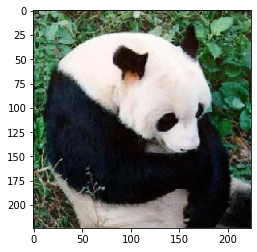

In [0]:
img = image.load_img('./dataset_ex1/image_query.jpg', target_size=(224, 224))
plt.imshow(img)

**Calculate distances between the query image and all downloaded images**

In [0]:
distances, indices = neighbors.kneighbors([feature_list[filenames.index('/content/dataset_ex1/image_query.jpg')]])

distances = distances[0]
indices = indices[0]

**Print out two images similar to query images.**

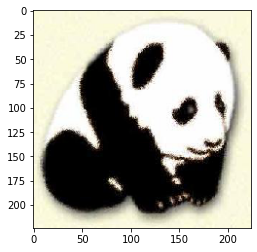

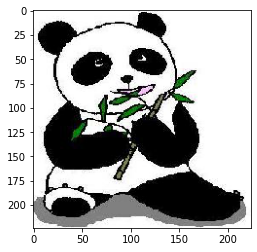

In [0]:
num_of_similar_image = 2

for i in range(1,num_of_similar_image+1):

  img = image.load_img(filenames[indices[i]], target_size=(224, 224))

  plt.imshow(img)
  plt.show()

# Mini project #3

## Q1: Exercising transfer learning in Google Colab (40 pts)

In Q1, we will practice transfer learning. Skeleton codes will be provided. Read the instructions and write the code, or complete missing parts of the code to perform transfer learning.

**Import packages**

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
import math
import os
import numpy as np


**Organize dataset**

Before doing transfer learning, we need to devide the image files into two sets – training and validation. Directory structure will look something like this:

```
dataset_ex2
 |__train (n = 2,000)
 |    |__cat (n = 1,000)
 |    |__dog (n = 1,000)
 |__val (n= 400)
      |__cat (n = 200)
      |__dog (n = 200)
```

**(Requirement)** Organize the downloaded dateset (cat vs. dog) with the above structure

*Note:*
- *You can download the dataset via this [link](https://drive.google.com/uc?id=14OCjTGbcW28_CiAcxNLg-XchXb6jO843).*
- *Train data and validation data should be independent of each other.*
- *You do not need to consider data other than 2,400 data used for train and validation dataset*

In [0]:
from zipfile import ZipFile

!mkdir -p ./dataset_ex2_original
!gdown https://drive.google.com/uc?id=14OCjTGbcW28_CiAcxNLg-XchXb6jO843 --output dataset_ex2_original.zip

with ZipFile('dataset_ex2_original.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('dataset_ex2_original')

Downloading...
From: https://drive.google.com/uc?id=14OCjTGbcW28_CiAcxNLg-XchXb6jO843
To: /content/dataset_ex2_original.zip
825MB [00:04, 191MB/s]


In [0]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_list(root_dir):
    file_list = []
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
    return file_list

In [0]:
dog_pic = "/content/dataset_ex2_original/PetImages/Dog"
cat_pic = "/content/dataset_ex2_original/PetImages/Cat"


dog_file = get_file_list(dog_pic)
cat_file = get_file_list(cat_pic)


print("A list of image files (n=%d)" %len(dog_file))
print("A list of image files (n=%d)" %len(cat_file))


print(dog_file)
print(cat_file)


A list of image files (n=12499)
A list of image files (n=12499)
['/content/dataset_ex2_original/PetImages/Dog/5011.jpg', '/content/dataset_ex2_original/PetImages/Dog/10014.jpg', '/content/dataset_ex2_original/PetImages/Dog/925.jpg', '/content/dataset_ex2_original/PetImages/Dog/10536.jpg', '/content/dataset_ex2_original/PetImages/Dog/10563.jpg', '/content/dataset_ex2_original/PetImages/Dog/1904.jpg', '/content/dataset_ex2_original/PetImages/Dog/10453.jpg', '/content/dataset_ex2_original/PetImages/Dog/12432.jpg', '/content/dataset_ex2_original/PetImages/Dog/5532.jpg', '/content/dataset_ex2_original/PetImages/Dog/8853.jpg', '/content/dataset_ex2_original/PetImages/Dog/2146.jpg', '/content/dataset_ex2_original/PetImages/Dog/5210.jpg', '/content/dataset_ex2_original/PetImages/Dog/2107.jpg', '/content/dataset_ex2_original/PetImages/Dog/6142.jpg', '/content/dataset_ex2_original/PetImages/Dog/11315.jpg', '/content/dataset_ex2_original/PetImages/Dog/4864.jpg', '/content/dataset_ex2_original/Pet

In [0]:
# to do (01) : Organize dataset
import numpy as np
from sklearn.model_selection import train_test_split

X =  dog_file
Y =  cat_file
D_train, D_test, C_train, C_test = train_test_split(X, Y, test_size=200,train_size=1000, random_state=321)

print("A number of train image files for dog (n=",len(D_train),")") 
print("A number of test image files for dog (n=",len(D_test),")") 
print("A number of train image files for cat (n=",len(C_train),")") 
print("A number of test image files for cat (n=",len(C_test),")") 




A number of train image files for dog (n= 1000 )
A number of test image files for dog (n= 200 )
A number of train image files for cat (n= 1000 )
A number of test image files for cat (n= 200 )


In [0]:
!mkdir -p ./dataset_ex2/train/dog 
!mkdir -p ./dataset_ex2/val/dog
!mkdir -p ./dataset_ex2/train/cat
!mkdir -p ./dataset_ex2/val/cat


t_dog = "content/dataset_ex2/train/dog" 
v_dog = "content/dataset_ex2/val/dog"
t_cat = "content/dataset_ex2/train/cat"
v_cat = "content/dataset_ex2/val/cat"
print(t_dog)



content/dataset_ex2/train/dog


In [0]:
import shutil, os

for x in D_train: 
  shutil.copy(x, '/content/dataset_ex2/train/dog')
  
for y in D_test: 
  shutil.copy(y, '/content/dataset_ex2/val/dog')

for z in C_train: 
  shutil.copy(z, '/content/dataset_ex2/train/cat')

for c in C_test: 
  shutil.copy(c, '/content/dataset_ex2/val/cat')


print(len(get_file_list('/content/dataset_ex2/train/cat')),
len(get_file_list('/content/dataset_ex2/val/cat')),
len(get_file_list('/content/dataset_ex2/train/dog')),
len(get_file_list('/content/dataset_ex2/val/dog')))



1000 200 1000 200


**Build the data pipeline**

**(requirement)** Complete the codes for building the data pipeline

*Note:*
- *The default input size for MobileNetV2 model is 224x224*
- *Let's use 64 as batch size* (you may use different number for batch size)

In [0]:
# to do (02) : Complete the codes for building the data pipeline
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import math


TRAIN_DATA_DIR = '/content/dataset_ex2/train'
VALIDATION_DATA_DIR = '/content/dataset_ex2/val'
TRAIN_SAMPLES = 2000
VALIDATION_SAMPLES = 400
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64

** **Augment** the data** **굵은 텍스트**

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [0]:
train_generator = train_datagen.flow_from_directory(TRAIN_DATA_DIR,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    seed=12345,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(VALIDATION_DATA_DIR,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    shuffle=False,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical') 

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


**Define the model**

**(requirement)** Complete the codes for defining the model

*Note:*
- *Use MobileNetV2 as base model (specfiy `input_shape` and `include_top` parameters)*
- *Write the code that freezes the layer.*

In [0]:
def model_maker():
  base_model = MobileNetV2(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
  # to do (03) : use MobileNetV2 as base model.
  # hint: You can only "input_shape" and "include_top" as parameters.
  
  for layer in base_model.layers[:]:
    layer.trainable = False #Freeze the layers      
  # to do (04): write the code that freezes the layer.
  
  input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))

  custom_model = base_model(input)
  custom_model = GlobalAveragePooling2D()(custom_model)
  custom_model = Dense(64, activation='relu')(custom_model)
  custom_model = Dropout(0.5)(custom_model)
  predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)

  return Model(inputs=input, outputs=predictions)


**Train and Test**

*Note:*
- *Be patient. This will take some time!*

In [0]:
model = model_maker()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['acc'])

model.fit_generator(
    train_generator,
    steps_per_epoch=math.ceil(float(TRAIN_SAMPLES) / BATCH_SIZE),
    epochs = 10,
    validation_data=validation_generator,
    validation_steps=math.ceil(float(VALIDATION_SAMPLES) / BATCH_SIZE)
)

9412608/9406464 [==============================] - 0s 0us/step
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
32/32 [==============================] - 100s 3s/step - loss: 0.2275 - acc: 0.9075 - val_loss: 0.1501 - val_acc: 0.9575
Epoch 2/10
32/32 [==============================] - 100s 3s/step - loss: 0.0985 - acc: 0.9685 - val_loss: 0.0713 - val_acc: 0.9850
Epoch 3/10
32/32 [==============================] - 101s 3s/step - loss: 0.0712 - acc: 0.9735 - val_loss: 0.0732 - val_acc: 0.9875
Epoch 4/10
32/32 [==============================] - 99s 3s/step - loss: 0.0647 - acc: 0.9785 - val_loss: 0.0595 - val_acc: 0.9875
Epoch 5/10
32/32 [==============================] - 98s 3s/step - loss: 0.0465 - acc: 0.9815 - val_loss: 0.0606 - val_acc: 0.9875
Epoch 6/10
32/32 [==============================] - 101s 3s/step - loss: 0.0652 - acc: 0.9750 - val_loss: 0.0611 - val_acc: 0.9850
Epoch 7/10
32/32 [==============================] - 99s 3s/step - loss: 0.038

**Save the model**

**(requirement)** Save the model you trained

In [0]:
# to do (05): save the model you trained
model.save('model.v2')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model.v2/assets


**Simple prediction test using the customized model**

**(requirement)** Download any images of cat or dog from the web and classify it using the model you trained

*Note:*
- *Download any images of cat or dog from the web and classify it using the model you trained.*
- *For classification, use `classfiy_cat_dog2` function you previously defined*

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  119k  100  119k    0     0   239k      0 --:--:-- --:--:-- --:--:--  239k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 42987  100 42987    0     0  78730      0 --:--:-- --:--:-- --:--:-- 78730
cat: 0.999513, dog: 0.000487



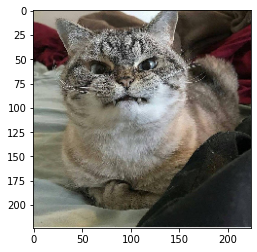

cat: 0.004435, dog: 0.995565



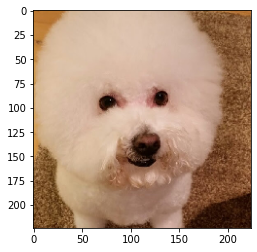

In [0]:
# to do (06) : Download any images of cat or dog from the web
!curl https://i.pinimg.com/originals/50/f3/00/50f300a6980d8e7f3117181c3e18658e.jpg --output cat3.jpg
!curl https://lh3.googleusercontent.com/nuxQF1z4dNQ7LyOWuFaCMqr7pRfGk4eKZb6XVR3RNu-VIJlhsBOq6Gw4DE7qxWvpv80GrBVQlNgxNlxcogefR5-3L5yEOoGjdFMPdVac_EYjdnF4d0pTh0su0KywnjcAMe7xHkiHl4vv9e4-vp50qfDPF2GDWc3FcRbwuebnkpS4jdxkYNUsF2sqJ51DQidyfmhDppjpRP8L5isbi2M9LAMoeb6pCfmbs3sgY0imoU5QCmjdKcO1RcIsNY2zhLl1FZ2yoAjtIGPlJ0SksMGq54goW5qUtm8U4kjf-Xq8wfI-LeKtFedcNNDyZGU_xR6u-Z6ydcSPSlF-GeBzrT-b39qS-glHOruQ-x7hn0tNj6DZ5XInzr5Ci5l_rT_u1cVVHjRmfbhx1F9ku6HNVCi5448_0iMEMOB2_Gm0Gvf06GhSAZ-0oReAT9180IkHPXME6e3OaLhiqZGTVF1dAUClnkAtKEB1Vvh_nVycyiuMdaC8hfmKm_x_cywZsgyVwHPgl3JybBu1dzFFVoikOO-OBYWa0Tor8gdAc_UvuSA5nHpsLtnlb8nZwYLekS5d_JuxifB9iUjh5vftxQuMf63UxHn5S7fWGsh-X08fEMFcz3AiRPdTVV5dDGlVNO4yNjjxiVP3XBz-BD7gJqgydE5LDHzSRqHeQTfk5uXHN71KjAROlSDNUAxD_nO_CXCP=s530-no?authuser=0 --output dog3.jpg

cat_path = 'cat3.jpg'
dog_path = 'dog3.jpg'

model = load_model('model.v2')

# to do (07) : classify it using the model we trained and classfiy_cat_dog2 function
images = [cat_path, dog_path]

for i in images:
  classify_cat_dog2(i,model)

## Q2: Finger gesture training using transfer learning (50 pts)

We have so far practiced how to transfer learning. Now, let's train the model for classifying what we want through the transfer learning. We will use `MobileNetV2`, which is memory-efficient and suitable for mobile applications(For more details about MobileNetV2, [See](http://openaccess.thecvf.com/content_cvpr_2018/papers/Sandler_MobileNetV2_Inverted_Residuals_CVPR_2018_paper.pdf)). The gestures are in the images below. Things you should do are:
  
* Take at least 50 pictures per gesture to obtain training and validation data set, and the ratio of the training data to the validation data is 4:1 (Note that pictures must be taken at various angles)
* Organize finger gestures dataset (i.e., train, validation)
* Perform the transfer learning using MobileNetV2 (For this work, you can use the parameters used in the previous examples)
* Evaluate the performance (e.g., accuracy) of the model using train and validation dataset
* Test the performance of the model using test images (at least three images per gesture)
* Evaluate and report how well the model classified the hand gestures (e.g., accuracy)

*Three finger gestures*
![alt text](https://drive.google.com/uc?id=1NjD6xMzmXBh4HPbsG9PuOI4ELBknmfX7)

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
import math
import os
import numpy as np


In [151]:
from zipfile import ZipFile

!mkdir -p ./dataset_ex3
!gdown https://drive.google.com/u/0/uc?id=1v8TO8QwGnxzSOEn0EXKLd0wDTT5LGQVU --output 'dataset_ex3_add.zip'
#https://drive.google.com/uc?id=14OCjTGbcW28_CiAcxNLg-XchXb6jO843
with ZipFile('dataset_ex3_add.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('dataset_ex3_add')

Downloading...
From: https://drive.google.com/u/0/uc?id=1v8TO8QwGnxzSOEn0EXKLd0wDTT5LGQVU
To: /content/dataset_ex3_add.zip
1.31GB [00:12, 103MB/s]


In [0]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_list(root_dir):
    file_list = []
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
    return file_list

In [153]:
one_pic = "/content/dataset_ex3_add/one"
two_pic = "/content/dataset_ex3_add/two"
three_pic = "/content/dataset_ex3_add/three"


one_file = get_file_list(one_pic)
two_file = get_file_list(two_pic)
three_file = get_file_list(three_pic)


print("A list of one finger image files (n=%d)" %len(one_file))
print("A list of two finger image files (n=%d)" %len(two_file))
print("A list of three finger image files (n=%d)" %len(three_file))


print(one_file)
print(two_file)
print(three_file)


A list of one finger image files (n=162)
A list of two finger image files (n=158)
A list of three finger image files (n=165)
['/content/dataset_ex3_add/one/20200521_154803_068.jpg', '/content/dataset_ex3_add/one/20200521_154803_094.jpg', '/content/dataset_ex3_add/one/20200521_021107(0).jpg', '/content/dataset_ex3_add/one/20200521_021158.jpg', '/content/dataset_ex3_add/one/20200521_021229.jpg', '/content/dataset_ex3_add/one/20200521_154803_091.jpg', '/content/dataset_ex3_add/one/20200521_154803_030.jpg', '/content/dataset_ex3_add/one/20200521_154803_032.jpg', '/content/dataset_ex3_add/one/20200521_154803_071.jpg', '/content/dataset_ex3_add/one/20200521_021130(0).jpg', '/content/dataset_ex3_add/one/20200521_154803_099.jpg', '/content/dataset_ex3_add/one/20200521_154803_079.jpg', '/content/dataset_ex3_add/one/20200521_021108.jpg', '/content/dataset_ex3_add/one/20200521_154803_034.jpg', '/content/dataset_ex3_add/one/20200521_021148.jpg', '/content/dataset_ex3_add/one/20200521_021226.jpg', 

In [154]:
# to do (01) : Organize dataset
import numpy as np
from sklearn.model_selection import train_test_split

One_train, One_test = train_test_split(one_file, test_size=0.25,train_size=0.75, random_state=321)
Two_train, Two_test = train_test_split(two_file, test_size=0.25,train_size=0.75, random_state=321)
Three_train, Three_test = train_test_split(three_file, test_size=0.25,train_size=0.75, random_state=321)

print("A number of train image files for One_train (n=",len(One_train),")") 
print("A number of train image files for One_test (n=",len(One_test),")") 
print("A number of train image files for Two_train (n=",len(Two_train),")") 
print("A number of train image files for Two_test (n=",len(Two_test),")") 
print("A number of train image files for Three_train (n=",len(Three_train),")") 
print("A number of train image files for Three_test (n=",len(Three_test),")") 




A number of train image files for One_train (n= 121 )
A number of train image files for One_test (n= 41 )
A number of train image files for Two_train (n= 118 )
A number of train image files for Two_test (n= 40 )
A number of train image files for Three_train (n= 123 )
A number of train image files for Three_test (n= 42 )


In [0]:
!mkdir -p ./dataset_ex3_add/train/one 
!mkdir -p ./dataset_ex3_add/val/one
!mkdir -p ./dataset_ex3_add/train/two
!mkdir -p ./dataset_ex3_add/val/two
!mkdir -p ./dataset_ex3_add/train/three
!mkdir -p ./dataset_ex3_add/val/three

t_one = "content/dataset_ex3_add/train/one" 
v_one = "content/dataset_ex3_add/val/one"
t_two = "content/dataset_ex3_add/train/two" 
v_two = "content/dataset_ex3_add/val/two"
t_three = "content/dataset_ex3_add/train/three" 
v_three = "content/dataset_ex3_add/val/three"



In [156]:
import shutil, os

for x in One_train: 
  shutil.copy(x, '/content/dataset_ex3_add/train/one')
  
for y in One_test: 
  shutil.copy(y, '/content/dataset_ex3_add/val/one')

for z in Two_train: 
  shutil.copy(z, '/content/dataset_ex3_add/train/two')

for c in Two_test: 
  shutil.copy(c, '/content/dataset_ex3_add/val/two')

for x in Three_train: 
  shutil.copy(x, '/content/dataset_ex3_add/train/three')
  
for y in Three_test: 
  shutil.copy(y, '/content/dataset_ex3_add/val/three')




print(len(get_file_list('/content/dataset_ex3_add/train/one')),
len(get_file_list('/content/dataset_ex3_add/val/one')),
len(get_file_list('/content/dataset_ex3_add/train/two')),
len(get_file_list('/content/dataset_ex3_add/val/two')),
len(get_file_list('/content/dataset_ex3_add/train/three')),
len(get_file_list('/content/dataset_ex3_add/val/three')))

print("number of train sample:",len(get_file_list('/content/dataset_ex3_add/train')),
      "number of validation sample:",len(get_file_list('/content/dataset_ex3_add/val')))

121 41 118 40 123 42
number of train sample: 362 number of validation sample: 123


In [0]:
# to do (02) : Complete the codes for building the data pipeline
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import math


TRAIN_DATA_DIR = '/content/dataset_ex3_add/train'
VALIDATION_DATA_DIR = '/content/dataset_ex3_add/val'
TRAIN_SAMPLES = 362
VALIDATION_SAMPLES = 123
NUM_CLASSES = 3
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64

** **Augment** the data** **굵은 텍스트**

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [159]:
train_generator = train_datagen.flow_from_directory(TRAIN_DATA_DIR,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    seed=12345,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(VALIDATION_DATA_DIR,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    shuffle=False,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical') 

Found 362 images belonging to 3 classes.
Found 123 images belonging to 3 classes.


In [0]:
def model_maker():
  base_model = MobileNetV2(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
  # to do (03) : use MobileNetV2 as base model.
  # hint: You can only "input_shape" and "include_top" as parameters.
  
  for layer in base_model.layers[:]:
    layer.trainable = False #Freeze the layers      
  # to do (04): write the code that freezes the layer.
  NUM_CLASSES = 3
  input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))

  custom_model = base_model(input)
  custom_model = GlobalAveragePooling2D()(custom_model)
  custom_model = Dense(64, activation='relu')(custom_model)
  custom_model = Dropout(0.5)(custom_model)
  predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)

  return Model(inputs=input, outputs=predictions)


In [161]:
model = model_maker()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['acc'])

model.fit_generator(
    train_generator,
    steps_per_epoch=math.ceil(float(TRAIN_SAMPLES) / BATCH_SIZE),
    epochs = 10,
    validation_data=validation_generator,
    validation_steps=math.ceil(float(VALIDATION_SAMPLES) / BATCH_SIZE)
)

Epoch 1/10
6/6 [==============================] - 119s 20s/step - loss: 1.7689 - acc: 0.3370 - val_loss: 0.9019 - val_acc: 0.6016
Epoch 2/10
6/6 [==============================] - 120s 20s/step - loss: 0.9980 - acc: 0.5387 - val_loss: 0.7511 - val_acc: 0.7236
Epoch 3/10
6/6 [==============================] - 117s 19s/step - loss: 0.8384 - acc: 0.5856 - val_loss: 0.6743 - val_acc: 0.7317
Epoch 4/10
6/6 [==============================] - 113s 19s/step - loss: 0.7745 - acc: 0.6796 - val_loss: 0.6175 - val_acc: 0.8211
Epoch 5/10
6/6 [==============================] - 115s 19s/step - loss: 0.7044 - acc: 0.6989 - val_loss: 0.5349 - val_acc: 0.8211
Epoch 6/10
6/6 [==============================] - 115s 19s/step - loss: 0.6071 - acc: 0.7403 - val_loss: 0.4872 - val_acc: 0.7967
Epoch 7/10
6/6 [==============================] - 115s 19s/step - loss: 0.5682 - acc: 0.7514 - val_loss: 0.4489 - val_acc: 0.8211
Epoch 8/10
6/6 [==============================] - 112s 19s/step - loss: 0.5200 - acc: 0.78

In [162]:
# to do (05): save the model you trained
model.save('model.q2_add')

INFO:tensorflow:Assets written to: model.q2_add/assets


In [0]:
def classify_fingers(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = expanded_img_array / 255.  # Preprocess the image

    prediction = model.predict(preprocessed_img)

    print('one: %f, two: %fn, three: %f\n' %(prediction[0][0],prediction[0][1],prediction[0][2]))
    
    plt.imshow(img)
    plt.show()

In [164]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
# to do (06) : Download any images of cat or dog from the web
!curl https://lh3.googleusercontent.com/pw/ACtC-3eTmeWNjWwsGaqIo00bUKQf1D3t2P5XC9oSfPVTyLQAitJvi7h2rI4ZNcqx7K9JacVJFCz_mLpZKoUTn8kOMDN9hY88-TW3jLXqDwaK2VzDdMqmh-kTdzjtgPTVDQpHBmxTYNPVx5EZLeVPimuo69LU=w539-h710-no?authuser=0 --output one.jpg
!curl https://lh3.googleusercontent.com/pw/ACtC-3dYEBpejuhPl_vn6Kxsp3RnZ-7yYieCW9X5jXkPXs3qHZeaGhCgnBJWgTNAo0M60qeQtcG3VhbtPALgdyW-RCczRsyHB0do1LmWUx9f27XdsNARGvdYG23WTWzJAbL0_qRylRFCA2WTTjNdjRfu4g3z=w536-h707-no?authuser=0 --output two.jpg
!curl https://lh3.googleusercontent.com/pw/ACtC-3fPjHv91inP4hy4xIzxE7h03aam4MDLTwfCb-XW2WnuJk13_0hgusncxa_kLOvsjs5E5e7b2OpaAE-DRIiBRCmjhAVR_HPDFxTI1xEnPzo2kn3ciK8wuOHnJdK9flGBQTe4ykAN2_ijX4Dr5jn27fyp=w523-h709-no?authuser=0 --output three.jpg

one_path = 'one.jpg'
two_path = 'two.jpg'
three_path = 'three.jpg'

model = load_model('model.q2_add')



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   697k      0 --:--:-- --:--:-- --:--:--  696k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  267k  100  267k    0     0   996k      0 --:--:-- --:--:-- --:--:--  992k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  261k  100  261k    0     0  1154k      0 --:--:-- --:--:-- --:--:-- 1154k


one: 0.932528, two: 0.027667n, three: 0.039805



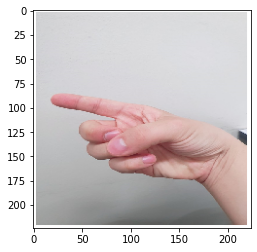

one: 0.445903, two: 0.106107n, three: 0.447991



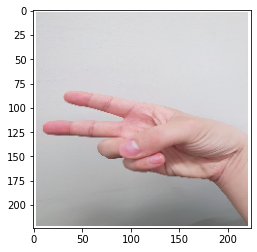

one: 0.678237, two: 0.041069n, three: 0.280694



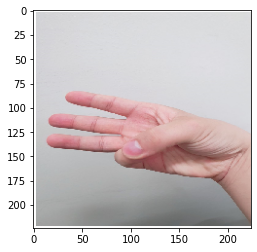

In [165]:
# to do (07) : classify it using the model we trained and classfiy_cat_dog2 function
import matplotlib.pyplot as plt

images = [one_path, two_path, three_path]
for i in images:
  classify_fingers(i,model)


one: 0.966412, two: 0.011298n, three: 0.022290



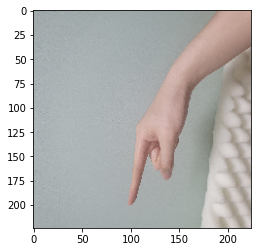

one: 0.995777, two: 0.002723n, three: 0.001500



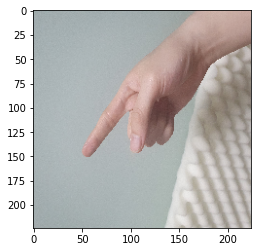

one: 0.996792, two: 0.001963n, three: 0.001245



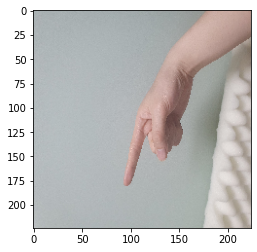

one: 0.936734, two: 0.032245n, three: 0.031022



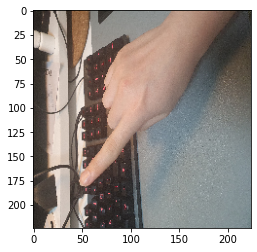

one: 0.930234, two: 0.018153n, three: 0.051613



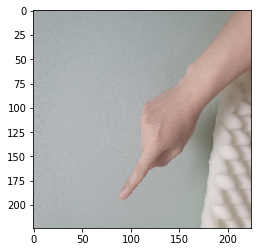

one: 0.976719, two: 0.007419n, three: 0.015863



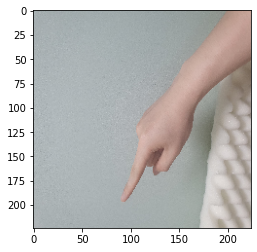

one: 0.970899, two: 0.021793n, three: 0.007308



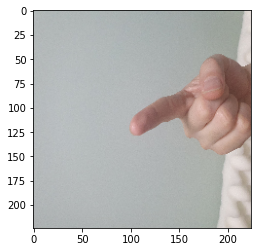

one: 0.962794, two: 0.018753n, three: 0.018453



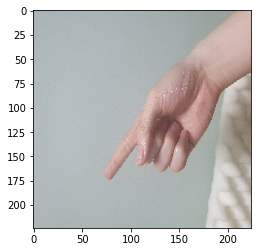

one: 0.484990, two: 0.129843n, three: 0.385167



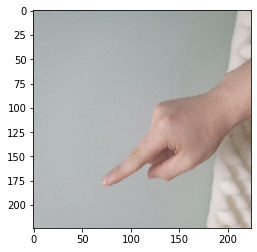

one: 0.961732, two: 0.020341n, three: 0.017927



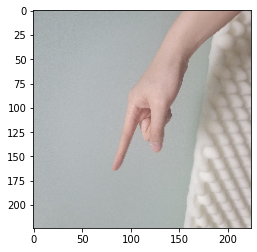

one: 0.992029, two: 0.005606n, three: 0.002365



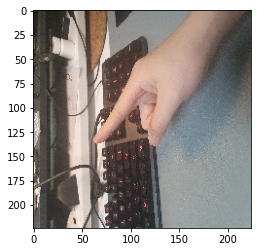

one: 0.920739, two: 0.059359n, three: 0.019902



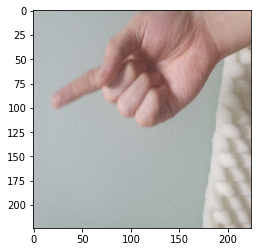

one: 0.701458, two: 0.128102n, three: 0.170440



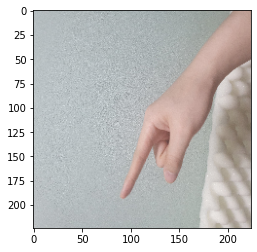

one: 0.986231, two: 0.006587n, three: 0.007182



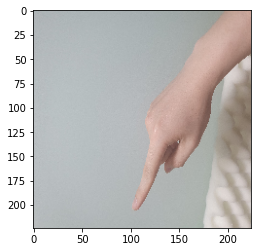

one: 0.943158, two: 0.029997n, three: 0.026844



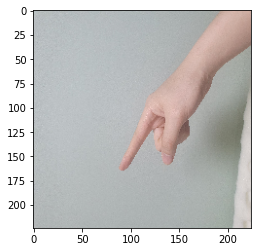

one: 0.940814, two: 0.036236n, three: 0.022950



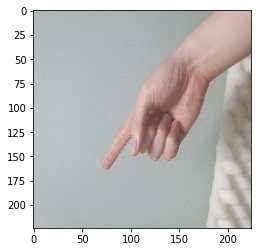

one: 0.010307, two: 0.036616n, three: 0.953077



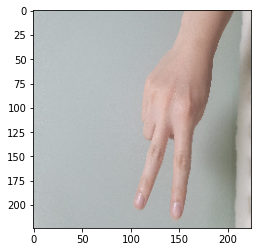

one: 0.138993, two: 0.058253n, three: 0.802754



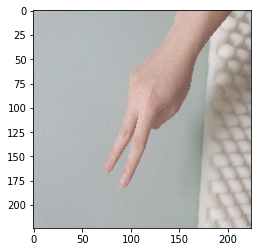

one: 0.037077, two: 0.029975n, three: 0.932947



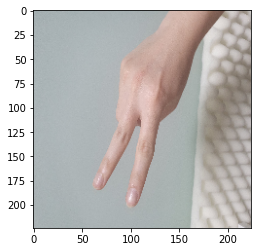

one: 0.081655, two: 0.024531n, three: 0.893814



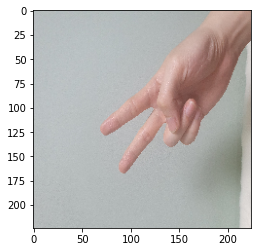

one: 0.189389, two: 0.372716n, three: 0.437894



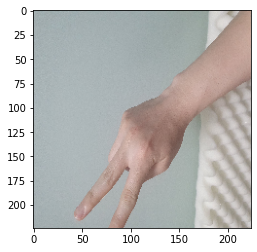

one: 0.637262, two: 0.064686n, three: 0.298052



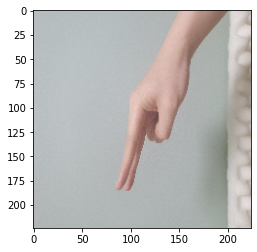

one: 0.065035, two: 0.027105n, three: 0.907860



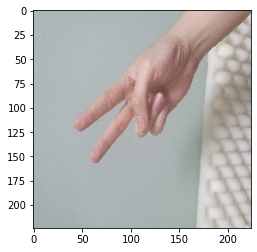

one: 0.109499, two: 0.154917n, three: 0.735584



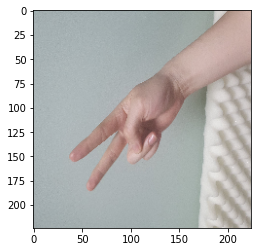

one: 0.197552, two: 0.190586n, three: 0.611862



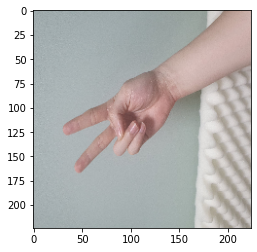

one: 0.395823, two: 0.208019n, three: 0.396158



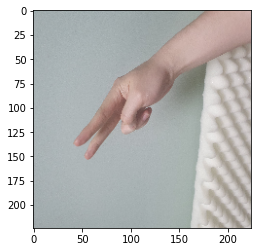

one: 0.843114, two: 0.043944n, three: 0.112941



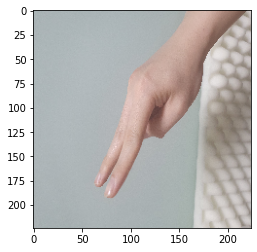

one: 0.049367, two: 0.023018n, three: 0.927616



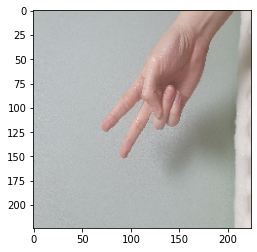

one: 0.549397, two: 0.188970n, three: 0.261633



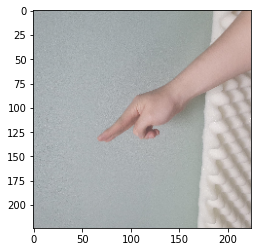

one: 0.019346, two: 0.006299n, three: 0.974355



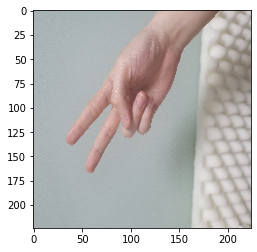

one: 0.092323, two: 0.018208n, three: 0.889470



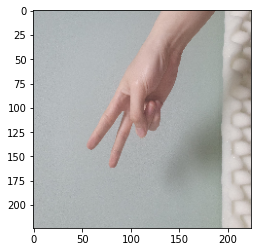

one: 0.313867, two: 0.429050n, three: 0.257083



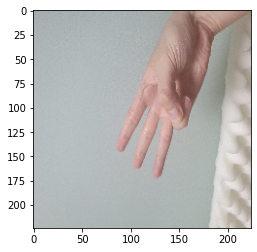

one: 0.159382, two: 0.505539n, three: 0.335079



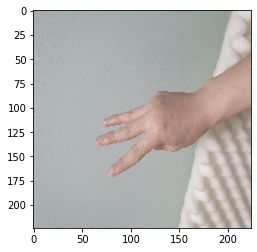

one: 0.041692, two: 0.320765n, three: 0.637543



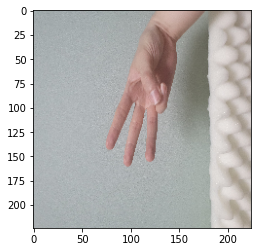

one: 0.146610, two: 0.586989n, three: 0.266401



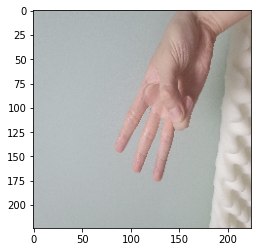

one: 0.265056, two: 0.365336n, three: 0.369608



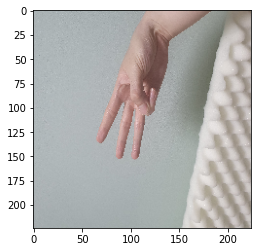

one: 0.050161, two: 0.637695n, three: 0.312143



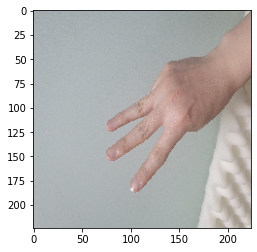

one: 0.245352, two: 0.417038n, three: 0.337610



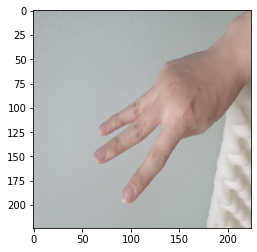

one: 0.372789, two: 0.489625n, three: 0.137587



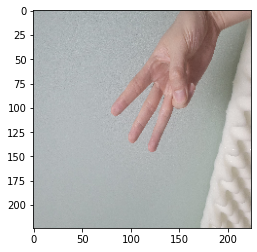

one: 0.605718, two: 0.101016n, three: 0.293266



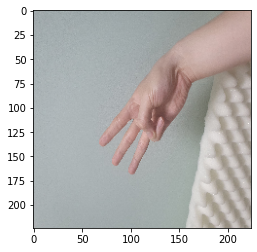

one: 0.212477, two: 0.256528n, three: 0.530995



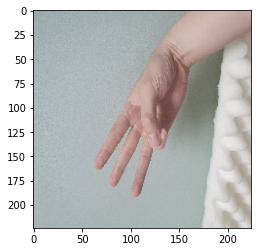

one: 0.429346, two: 0.199722n, three: 0.370932



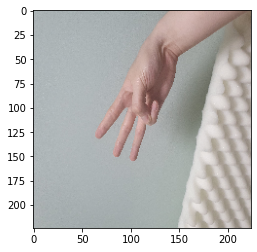

one: 0.436228, two: 0.354257n, three: 0.209515



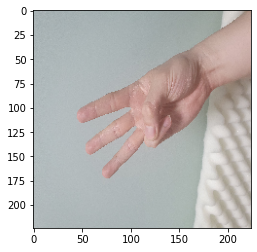

one: 0.077308, two: 0.229452n, three: 0.693240



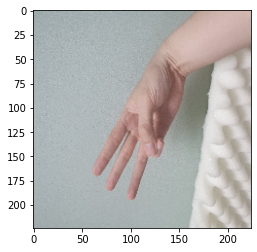

one: 0.557610, two: 0.194171n, three: 0.248219



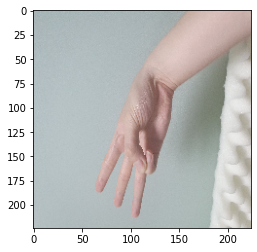

one: 0.130950, two: 0.476719n, three: 0.392331



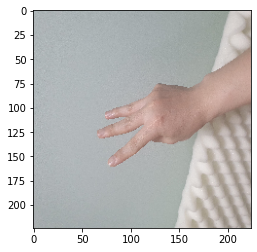

one: 0.345719, two: 0.410753n, three: 0.243528



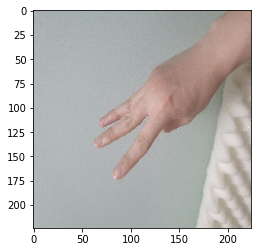

one: 0.381986, two: 0.519311n, three: 0.098703



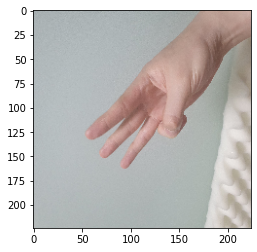

In [167]:
name = get_file_list('/content/dataset_ex3/val')

for i in name:
  classify_fingers(i,model)

## Q3 : Classification in Jetson Nano (50 pts)

In Q1 and Q2, we performed the transfer learning and created a custom model based on the `mobileNetV2` model. Now, we'll be able to see if our model classfiy hand gestures well in Jetson Nano! For this, things you should do are:

* Upload the model you trained in Q2 to Jetson Nano.
* Take a hand gesture picture using the camera connected to Jetson Nano and use these images as test dataset (at least 3 images per gesture)
* Evaluate and report how well the model classified the hand gestures (e.g., accuracy)